In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]

---------------------------------
Python interpreter: /home/imarevic/Documents/teaching/SRH/content/statistik/statistik-env/bin/python3


# Die Poisson-Verteilung

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

Eine weitere wichtige diskrete Wahrscheinlichkeitsverteilung ist die <a href="https://de.wikipedia.org/wiki/Poisson-Verteilung">Poisson-Verteilung</a>, benannt zu Ehren des französischen Mathematikers und Physikers <a href="https://de.wikipedia.org/wiki/Sim%C3%A9on_Denis_Poisson">Simeon D. Poisson</a> (1781-1840). Die Poisson-Verteilung wird häufig verwendet, um die Wahrscheinlichkeit zu beschreiben, dass eine Reihe von Ereignissen in einem bestimmten Zeit- oder Raumintervall eintritt, wobei die Wahrscheinlichkeit des Auftretens dieser Ereignisse sehr gering ist ({cite:t}`Papula2011` s.367). Da die Anzahl der Versuche jedoch sehr groß ist, treten diese Ereignisse tatsächlich ein.

Die Zufallsvariable $X$, die als **Poisson-Zufallsvariable** bezeichnet wird, ist die Anzahl der Ereignisse (oder des Eintreffens) solcher Ereignisse in einem bestimmten Zeit- oder Raumintervall. Eine Poisson-Zufallsvariable hat unendlich viele mögliche Werte, nämlich alle ganzen Zahlen ({cite:t}`fahrmeirstatistik` s.242).

Unter der Annahme, dass $\lambda$ der Erwartungswert solcher Ankünfte in einem Zeitintervall fester Länge ist, ist die Wahrscheinlichkeit, genau $x$ Ereignisse zu beobachten, durch die Wahrscheinlichkeitsfunktion gegeben

$$P(X = x) = e^{-\lambda}\frac{\lambda^x}{x!}, \qquad x = 0, 1, 2,\dots ,$$

wobei $\lambda$ eine positive reelle Zahl ist, die die durchschnittliche Anzahl der Ereignisse während eines festen Zeitintervalls darstellt, und $e≈2,7182818$ (die Eulersche Zahl). Somit wird jede bestimmte Poisson-Verteilung durch einen Parameter identifiziert, der gewöhnlich mit $\lambda$ (dem griechischen Buchstaben Lambda) bezeichnet wird. Wenn das Ereignis beispielsweise durchschnittlich $10$ Mal pro Sekunde auftritt, tritt es in $60$ Sekunden durchschnittlich $600$ Mal auf und $\lambda=600$.

## Die Poisson-Verteilung - ein Beispiel

Wenden wir die Poisson-Verteilung in Form eines Beispiels an. Wir konzentrieren uns auf das <a href="https://de.wikipedia.org/wiki/Jahrhunderthochwasser">Jahrhunderthochwasser</a>, ein Konzept, das im Flussbau häufig zur Planung von Hochwasserschutzmaßnahmen verwendet wird.

Erinnern wir uns an die mathematische Notation einer **Poisson-Zufallsvariablen**:

$$ P(X = x) = e^{-\lambda}\frac{\lambda^x}{x!}, \qquad x = 0, 1, 2, \dots ,  $$

wobei $\lambda$ eine positive reelle Zahl ist, die die durchschnittliche Anzahl der Ereignisse während eines festen Zeitintervalls darstellt, und $e≈2,7182818$.

Das *Jahrhunderthochwasser* ist eine Kurzbezeichnung für ein Hochwasser mit einer jährlichen Überschreitungswahrscheinlichkeit von $1 \%$ und einem durchschnittlichen Wiederholungsintervall von $100$ Jahren. Der Begriff kann jedoch für Menschen irreführend sein, denn sie stellen sich vor, dass der Begriff Hochwasser beschreibt, die einmal alle $100$ Jahre auftreten. Dies ist jedoch nicht der Fall. Ein Hochwasser mit einer jährlichen Überschreitungswahrscheinlichkeit von $1 \%$ bedeutet, dass in **jedem** einzelnen Jahr mit einer Wahrscheinlichkeit von $0,01$ ein Hochwasser in einer Größenordnung auftritt, die einem Jahrhunderthochwasser entspricht.

Im Rahmen einer Poisson-Verteilung wird der Erwartungswert $E(x)=\lambda$ eines solchen Hochwassers während des festen Intervalls von $100$ Jahren auf $\lambda=100×0,01=1$ gesetzt. Die Poisson-Zufallsvariable $X$ ist also die Anzahl der Ereignisse, die natürlich je nach Fragestellung verschiedene Werte annehmen kann. Wir können uns für die Wahrscheinlichkeit interessieren, dass ein solches Hochwasserereignis während des $100$-Jahres-Intervalls nicht auftritt, $P(x=0)$, oder wir wollen die Wahrscheinlichkeit wissen, dass ein solches Hochwasserereignis genau einmal während des $100$-Jahres-Intervalls auftritt, also $P(x=1)$, oder wir wollen die Wahrscheinlichkeit wissen, dass zwei oder mehr solcher Hochwasserereignisse während des $100$-Jahres-Intervalls auftreten, also $P(x≥2)$. Setzt man diese Werte in die obige Gleichung ein, so erhält man

$\lambda = 1, x = 0,1,2,\dots ,n$

$$P(X = 0) = e^{-1}\frac{1 \times 0}{0!}, \qquad \text{für } \  x = 0$$

$$P(X = 1) = e^{-1}\frac{1 \times 1}{1!}, \qquad \text{für } \  x = 1$$

$$ P(X \ge 2) = \sum_{i=2}^n e^{-1}\frac{1 \times x_i}{x_i!}, \qquad  \text{für } \  x_i = 2,3,\dots ,n $$

Wir wenden uns an Python, um die Berechnungen durchzuführen. Wir werden die Funktionen `poisson.pmf` und `poisson.cdf` verwenden.

In [3]:
x_0 = poisson.pmf(0, mu=1)
x_0

np.float64(0.36787944117144233)

In [4]:
x_1 = poisson.pmf(1, mu=1)
x_1

np.float64(0.36787944117144233)

$$ P(X \ge 2) = 1 -  P(X = 1) -  P(X = 0) $$

In [5]:
xge2 = 1 - x_1 - x_0
xge2

np.float64(0.26424111765711533)

Alternativ können wir doe `poisson.cdf` verwenden. 

In [6]:
1 - poisson.cdf(1, mu=1)

np.float64(0.26424111765711533)

Die Ergebnisse zeigen, dass die Wahrscheinlichkeit, dass während eines Zeitraums von $100$ Jahren kein Hochwasser $P(X=0)$ in einer Größenordnung auftritt, die einem Jahrhunderthochwasser entspricht, $0,37 $ beträgt, was interessanterweise genauso wahrscheinlich ist wie das Auftreten von genau einem Hochwasser $P(X=1)$. Die Wahrscheinlichkeit, dass zwei oder mehr $P(X≥2)$ solcher Hochwasserereignisse innerhalb des $100$-Jahres-Intervalls auftreten, ist $0,26$ und damit geringer. Beachten Sie jedoch, dass die Wahrscheinlichkeit, dass zwei oder mehr $P(X≥2)$ solcher Hochwasserereignisse während des 100-Jahres-Intervalls eintreten, etwa $26 \%$ beträgt!

Zur Überprüfung der Richtigkeit addieren wir die Wahrscheinlichkeiten $P(x=0), P(x=1)$ und $P(x≥2)$, was $1$ ergeben sollte,

In [7]:
x_0 + x_1 + xge2

np.float64(1.0)

Zur besseren Veranschaulichung stellen wir die Wahrscheinlichkeiten der Poisson-Zufallsvariablen $x=0,1,2,3,4,≥5$ dar.

Text(0, 0.5, 'Wahrscheinlichkeit (P=X)')

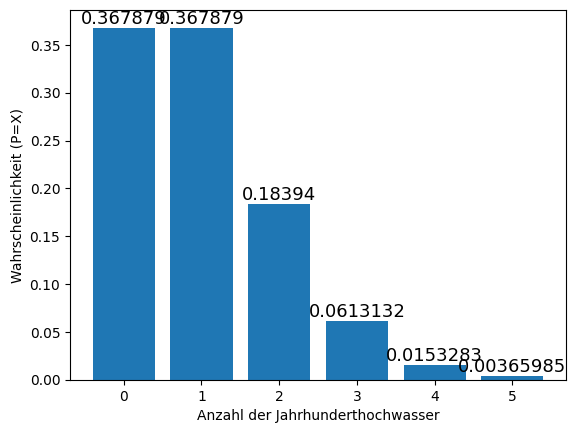

In [8]:
xs = [0, 1, 2, 3, 4, 5]
res = []

for x in xs:
    if x != 5:
        p = poisson.pmf(x, mu=1)
    else:
        p = 1 - poisson.cdf(4, mu=1)
    res.append(p)

fig, ax = plt.subplots()
ax.bar(xs, height=res)
_ = ax.bar_label(ax.containers[0], label_type="edge", size=13)

ax.set_xlabel("Anzahl der Jahrhunderthochwasser")
ax.set_ylabel("Wahrscheinlichkeit (P=X)")

## Form, Mittelwert und Standardabweichung einer Poisson-Verteilung
----------------------------------------

Alle Poisson-Verteilungen sind rechtsschief. Der Mittelwert $\mu$ und die Standardabweichung $\sigma$ einer Poisson-Zufallsvariablen mit dem Parameter $\lambda$ sind

$$\mu = \lambda$$

und

$$\sigma = \sqrt{\lambda}\text{.}$$

## Poisson-Approximation an die Binomialverteilung
----------------------------------------

In Situationen, in denen $n$ groß und $p$ sehr klein ist, kann die Poisson-Verteilung zur Annäherung an die Binomialverteilung verwendet werden. Erinnern Sie sich an die binomische Wahrscheinlichkeitsverteilung:

$$P(X = x) = {n \choose x}p^x(1-p)^{n-x}, \qquad x = 0, 1, 2, \dots , n $$

Wie im früheren Beispiel "Jahrhunderthochwasser" ist $n$ eine große Zahl $(100)$ und $p$ eine kleine Zahl $(0,01)$. Einsetzen in die Gleichung von oben $P(x=1)$ ergibt


$ P(X = 1)  = {100 \choose 1}\times 0,01^1\times (1 - 0,01)^{100 -1} $

$ = 100\times 0,01\times 0,3697296 $

$ = 0,3697296 $ 

Das Ergebnis kommt dem oben ermittelten Ergebnis sehr nahe `poisson.pmf(1,1)` $= 0,3678794$. Die geeignete Poisson-Verteilung ist diejenige, deren Mittelwert gleich dem der Binomialverteilung ist, d. h. $\lambda=np$, was in unserem Beispiel $\lambda=100×0,01=1$ ist.

Zum Abschluss dieses Abschnitts und um Ihnen eine Vorstellung von den Formen der verschiedenen Poisson-Wahrscheinlichkeitsverteilungen zu geben, werden im Folgenden drei verschiedene Poisson-Wahrscheinlichkeitsverteilungen und die entsprechenden kumulativen Poisson-Wahrscheinlichkeitsverteilungen für $\lambda=2,5, \lambda=7$ und $\lambda=12$ angegeben.

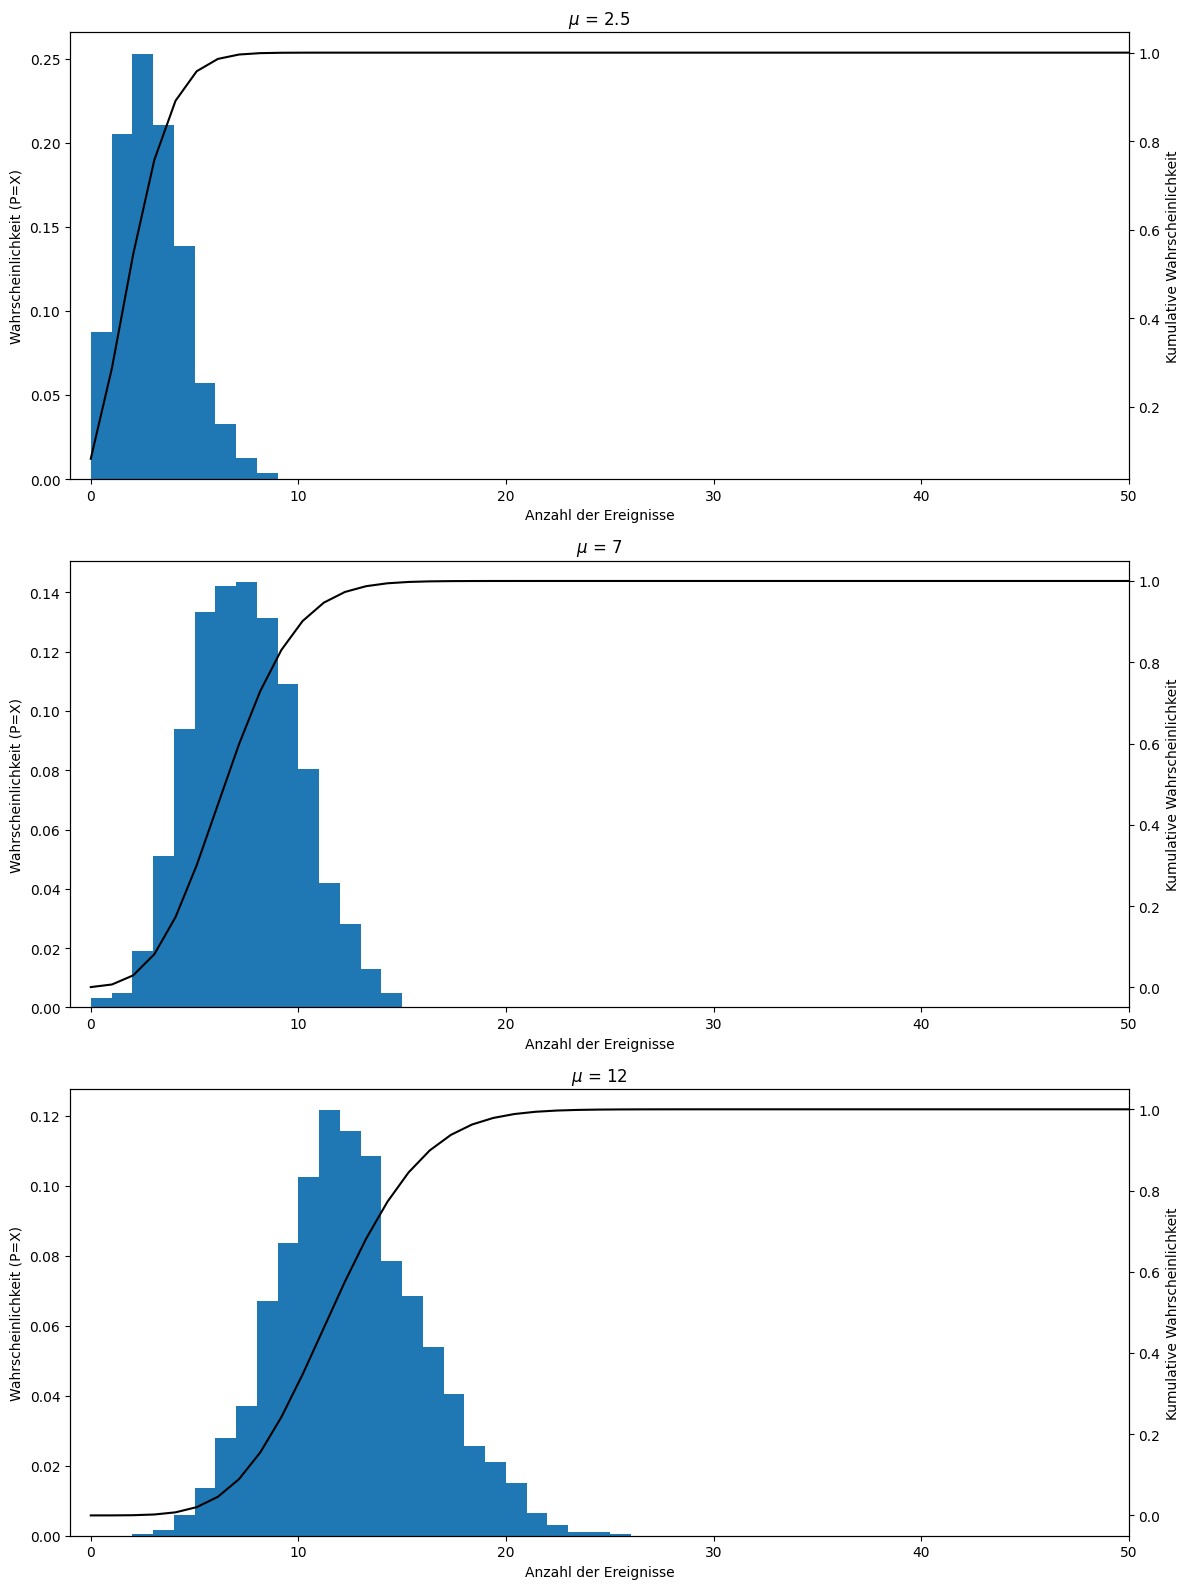

In [9]:
lambdas = [2.5, 7, 12]

fig, ax = plt.subplots(nrows=len(lambdas), figsize=(12, 16))
for e, _lambda in enumerate(lambdas):
    x = poisson.rvs(_lambda, size=2000)
    bins = max(x) - min(x)
    ax[e].hist(x, bins, density=True)
    ax[e].set_xlabel("Anzahl der Ereignisse")
    ax[e].set_ylabel("Wahrscheinlichkeit (P=X)")
    ax[e].set_title(f"$\mu$ = {_lambda}")

    x = np.linspace(0, 50, 50)
    cdf = poisson.cdf(x, mu=_lambda)
    ax2 = ax[e].twinx()
    ax2.set_ylabel("Kumulative Wahrscheinlichkeit")
    ax2.plot(x, cdf, color="k")

    ax[e].set_xlim(-1, 50)
fig.tight_layout()